In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

# IMPORTATION

In [3]:
#Importation CSV

erp = pd.read_excel("erp.xlsx")
liaison = pd.read_excel("liaison.xlsx")
web = pd.read_excel("web.xlsx")

# TRAITEMENT

In [4]:
#Renommage de la colonne id_web en SKU
liaison = liaison.rename(columns = {'product_id': 'product_id', 'id_web': 'sku'})
liaison.dtypes

product_id     int64
sku           object
dtype: object

## Doublon 

### Table liaison 

In [5]:
#Vérification de la présence de doublon
#Unité de gestion des stocks |  numéro unique utilisé pour le suivi interne des stocks d'une entreprise
print("Doublon sku:",liaison.duplicated(subset='sku').sum())
print("Doublon product_id",liaison.duplicated(subset='product_id').sum())

Doublon sku: 90
Doublon product_id 0


In [6]:
#Vérification des doublons dans la colonne SKU
liaison.loc[liaison['sku'].duplicated(keep=False),:]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [7]:
#Vérification de NaN
print(liaison.isnull().sum())

product_id     0
sku           91
dtype: int64


In [8]:
#Isolation des Sku contenant "-"
liaison[liaison['sku'].str.contains('-',na=False)]

,product_id,sku
443,4954,bon-cadeau-25-euros
822,7247,13127-1
823,7329,14680-1


In [9]:
#Vérification d'existence sans le caractère spécial
liaison.loc[(liaison['sku'] == 146801) | (liaison['sku'] == 131271)]

,product_id,sku


In [10]:
#Supression des NaN
liaison.dropna(subset='sku', inplace=True)

In [11]:
print(liaison.isnull().sum())

product_id    0
sku           0
dtype: int64


### Tablea web 

In [12]:
#Somme des doublons présent dans la colonne SKU
print("Doublon sku:",web.duplicated(subset='sku').sum())

Doublon sku: 798


In [13]:
#Afficache des doublons dans la colonne SKU
web.loc[web.duplicated(subset='sku'),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [14]:
#Affichage des SKU contenant le caractère "-"
web[web['sku'].str.contains('-',na=False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
#Affichage des doublons de la colonne SKU sans les NaN
web.loc[web.duplicated(subset ='sku',keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [16]:
#Affichage des doublons SKU & post_types
web.loc[web.duplicated(subset = ['sku','post_type'],keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Isoler pour vérifier si vide totalement
doublon = web.loc[web.duplicated(subset = ['sku','post_type'],keep=False),:]

In [18]:
#Vérification que les données soient totalement vide
doublon.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,85.0,85.0,85.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
mean,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,0.0,0.0,0.0


In [19]:
#Isolation des lignes pas totalement vide 
doublon[doublon['total_sales'].notnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [20]:
#Analyse d'un doublon / guid/post_type/post_mime_type différent
web.loc[web['sku'] == '13127-1']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [21]:
print(web.duplicated(subset = 'sku').sum())

798


In [22]:
#Isolation du post_type == product pour isoler les doublons
product = web.loc[web['post_type'] == 'product']

In [23]:
#vérification de l'isolation
product['post_type'].unique()

array(['product'], dtype=object)

In [24]:
#vérification de doublon

product.loc[product.duplicated(subset = 'sku'),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Table ERP

In [25]:
#Vérification des doublons
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [26]:
print(erp.duplicated(subset = 'product_id').sum())

0


In [27]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


# Le chiffre d’affaires par produit & le total du chiffre d’affaires réalisé en ligne

## Le chiffre d’affaires par produit 

In [28]:
#Liaison erp : product_id > liaison : Sku > web : sku
# erp['price'] * web['total_sales']

#Fusion des tables liaison & ERP
liaison_table = liaison.merge(erp, how='outer', on='product_id')

In [29]:
#Fusion des tables liaison_table & product - Indicator pour vérifier les merges

table_merge = liaison_table.merge(product, how='outer', on='sku',indicator=True)

In [30]:
#Vérification des doublons
table_merge.loc[table_merge.duplicated(keep=False),:]

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [31]:
#Vérification des liaison left only

left = table_merge.loc[table_merge['_merge'] == 'left_only']

In [32]:
left.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
185,4289,13771,0,22.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
227,4568,15065,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
230,4584,14785,0,32.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
334,4741,12601,0,12.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
368,4864,15154,0,8.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [33]:
#Vérification des liaison right only

table_merge.loc[table_merge['_merge'] == 'right_only']

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [34]:
#Création d'une nouvelle colonne ca_produit + insertion en début de table

table_merge.insert(4,'ca_produit', table_merge['price'] * table_merge['total_sales'])

In [35]:
table_merge.head()

,product_id,sku,onsale_web,price,ca_produit,stock_quantity,stock_status,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,145.2,0,outofstock,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0.0,0,outofstock,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0.0,0,outofstock,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,42.3,0,outofstock,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0.0,0,outofstock,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


## Total CA en ligne 

In [36]:
#Calcul du CA Total

ca_total = table_merge['ca_produit'].sum()

In [37]:
print("Chiffre d'affaire web total :",ca_total,'€')

Chiffre d'affaire web total : 70568.6 €


# OUTLIERS

## Boîte à moustache : Interquartile range 

In [38]:
# l’écart interquartile est une mesure de dispersion 
#qui s'obtient en faisant la différence entre le troisième et le premier quartile | EI = Q₃ - Q₁

Text(0.5, 1.0, 'Boîte à moustache : Prix')

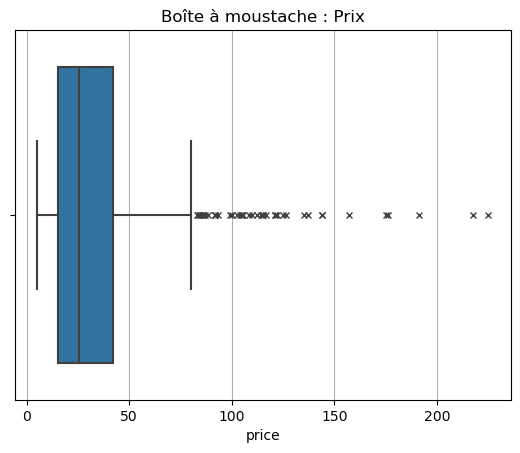

In [39]:
#Graphique boîte à moustache
prix = table_merge['price']

graph = sns.boxplot(x=table_merge["price"], flierprops={"marker": "x"})
graph.xaxis.grid(True) # Grille verticale

#Ajout du titre
plt.title('Boîte à moustache : Prix')

In [40]:
table_merge.loc[table_merge['price'] > 80]

,product_id,sku,onsale_web,price,ca_produit,stock_quantity,stock_status,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
63,4115,15382,1,100.0,0.0,11,instock,0.0,0.0,0.0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
65,4132,11668,1,88.4,0.0,5,instock,0.0,0.0,0.0,...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
197,4337,4679,1,83.0,0.0,13,instock,0.0,0.0,0.0,...,2020-07-08 17:35:03,2020-07-08 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
200,4352,15940,1,225.0,1125.0,0,outofstock,0.0,0.0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
202,4355,12589,1,126.5,1391.5,2,instock,0.0,0.0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
206,4359,13853,1,85.6,85.6,0,outofstock,0.0,0.0,0.0,...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
219,4402,3510,1,176.0,2288.0,8,instock,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
220,4404,3507,1,108.5,217.0,2,instock,0.0,0.0,0.0,...,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
222,4406,7819,1,157.0,0.0,3,instock,0.0,0.0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
223,4407,3509,1,104.0,104.0,6,instock,0.0,0.0,0.0,...,2020-07-04 09:45:03,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


### ZSCORE 

In [41]:
#Zscore = (x – moyenne)/ecart-type : exprime l'écart par rapport à la valeur moyenne
##< -1,96 ou > +1,96 | < 0,05 | 95% de confiance

In [42]:
#Ajout de la colonne Zscore
table_merge.insert(5,'zscore', stats.zscore(table_merge['price']))

In [43]:
table_merge.head()

,product_id,sku,onsale_web,price,ca_produit,zscore,stock_quantity,stock_status,virtual,downloadable,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,145.2,-0.319880,0,outofstock,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0.0,0.065891,0,outofstock,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0.0,-0.449744,0,outofstock,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,42.3,-0.705651,0,outofstock,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0.0,0.512774,0,outofstock,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


## Outliers Zscore 

In [44]:
#Isolation des données avec un zscore dépassant les 2 (un Z-score de 2 comprends ~95% de la population)
#aucun dépassant les -2
outliers = table_merge.loc[(table_merge['zscore'] > 2) | (table_merge['zscore'] < -2)]


In [45]:
#Graphique nuage de point 
y = table_merge.index
x = table_merge['price']

y_out = outliers.index
x_out = outliers['price']

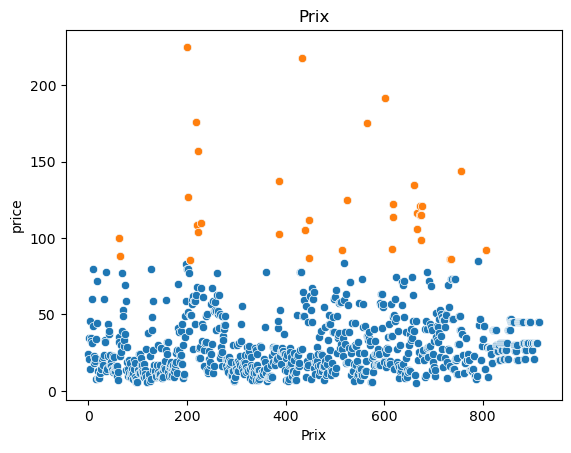

In [58]:
sns.scatterplot(data = table_merge['price'])

sns.scatterplot(data = outliers['price']) #Colore les outliers

#Ajout du titre et du nom de l'axe x
plt.title('Prix')
plt.xlabel('Prix')

plt.show()

In [47]:
#Nettoyage de la liste outliers
outliers = outliers.drop(['post_modified_gmt','comment_count','post_password','virtual','downloadable','post_type','post_mime_type','post_content_filtered','menu_order','post_parent','ping_status','comment_status'], axis=1)

In [48]:
outliers.head()

,product_id,sku,onsale_web,price,ca_produit,zscore,stock_quantity,stock_status,rating_count,average_rating,...,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,post_name,post_modified,guid,_merge
63,4115,15382,1,100.0,0.0,2.575313,11,instock,0.0,0.0,...,2018-02-13 11:08:45,2018-02-13 10:08:45,NaN,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",publish,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,https://www.bottle-neck.fr/?post_type=product&...,both
65,4132,11668,1,88.4,0.0,2.132249,5,instock,0.0,0.0,...,2018-02-13 11:43:55,2018-02-13 10:43:55,NaN,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,publish,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,https://www.bottle-neck.fr/?post_type=product&...,both
200,4352,15940,1,225.0,1125.0,7.349709,0,outofstock,0.0,0.0,...,2018-03-02 10:30:04,2018-03-02 09:30:04,NaN,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,https://www.bottle-neck.fr/?post_type=product&...,both
202,4355,12589,1,126.5,1391.5,3.587485,2,instock,0.0,0.0,...,2018-03-02 10:46:10,2018-03-02 09:46:10,NaN,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,https://www.bottle-neck.fr/?post_type=product&...,both
206,4359,13853,1,85.6,85.6,2.025303,0,outofstock,0.0,0.0,...,2018-03-02 11:11:48,2018-03-02 10:11:48,NaN,Champagne Larmandier-Bernier Grand Cru Les Che...,Belle maîtrise de ce millésime compliqué en Ch...,publish,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,https://www.bottle-neck.fr/?post_type=product&...,both


# Analyse bi-varié

In [49]:
#Graphique du nombre de vente en fonction du prix

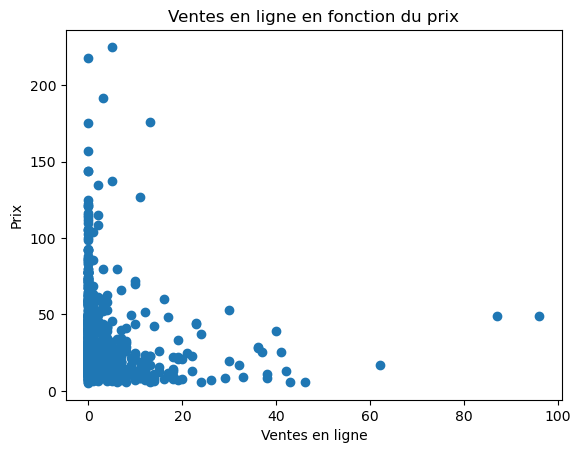

In [50]:
plt.scatter(table_merge['total_sales'],table_merge['price'])
plt.title('Ventes en ligne en fonction du prix')
plt.ylabel('Prix')
plt.xlabel('Ventes en ligne')
plt.show()